In [1]:
# Importing Necessary Libraries

import pandas as pd, numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
# Reading the data using Pandas Library
df = pd.read_csv("day.csv")

In [3]:
# Checking the Data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking for the basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Code to check for the null values explicitly
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Dropping the instant variable as it is just the serial number of the rows.

df.drop("instant", inplace = True, axis = 1)

In [7]:
# Again checking the top 5 rows of the Dataset
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Replacing the weekdays from numbers to the orignal day name
df.weekday = df.weekday.map({0:"Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"})

In [9]:
# Replacing numbers in the month column with the month name
df.mnth = df.mnth.map({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"})

In [10]:
# Replacing numbers in hte weather situation column with the weather condition name
df.weathersit = df.weathersit.map({1: "Clear or Partly Cloudy", 2: "Mist and Cloudy", 3: "Light Snow/Rain", 4: "Heavy Rain and Fog"})

In [11]:
# Replacing season number with the season name in the season column
df.season = df.season.map({1: "Spring", 2 : "Summer", 3: "Fall", 4: "Winter"})

In [12]:
# Dropping the dteday column as we already have the yr and month column seperately
df.drop("dteday", axis = 1, inplace = True)

In [13]:
# Checking the head of the dataframe after making the subtle changes
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,Jan,0,Mon,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,Jan,0,Tue,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,Jan,0,Wed,1,Clear or Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,Jan,0,Thu,1,Clear or Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,Jan,0,Fri,1,Clear or Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Exploratory Data Analysis

- Univariate Analysis
  
   - Keeping the nature of study in mind choosing cnt variable as the target variable. 

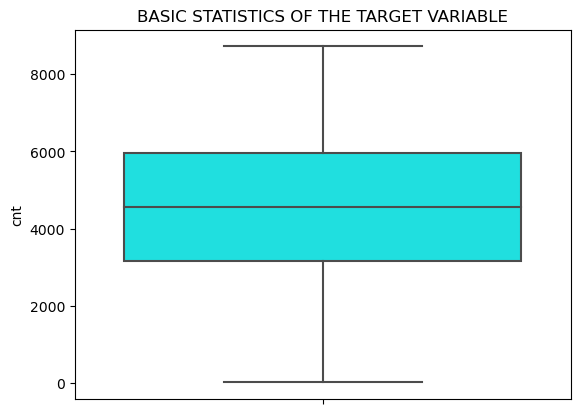

In [14]:
# Plotting the box plot for the target variable.

sns.boxplot(y = df.cnt, color = "Cyan")
plt.title("Basic Statistics of the Target Variable".upper())
plt.show()

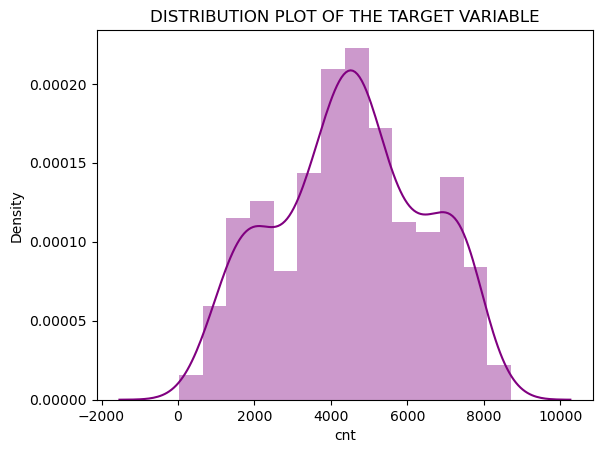

In [15]:
# Plotting the Distribution plot for the target variable to check the distribution of the target vairable.

sns.distplot(df.cnt, color = "Purple")
plt.title("Distribution plot of the Target Variable".upper())
plt.show()

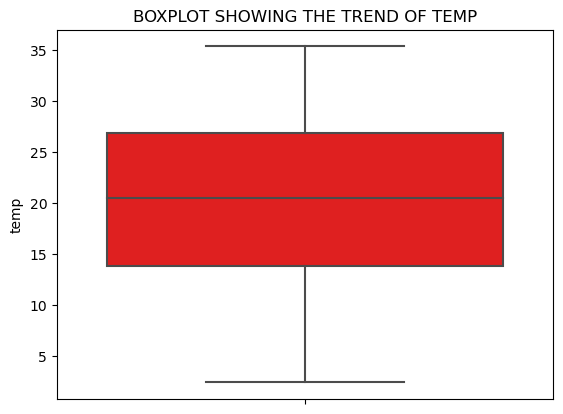

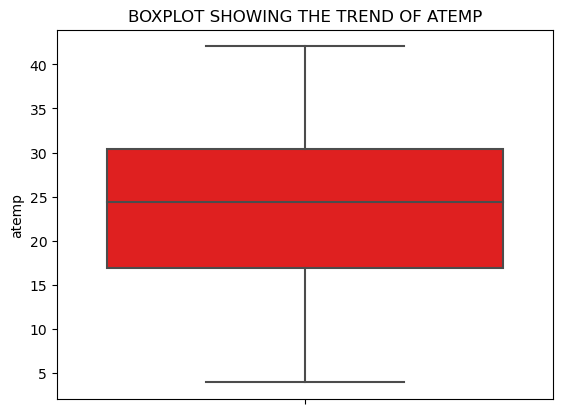

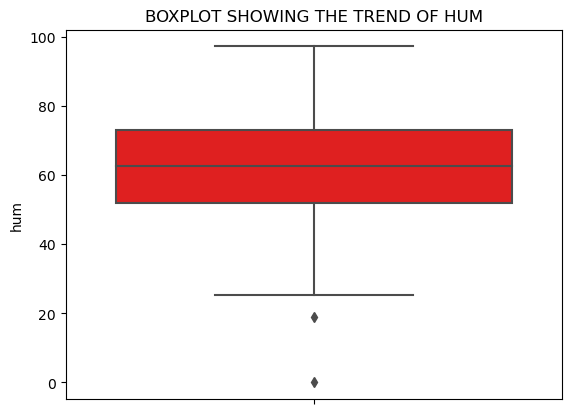

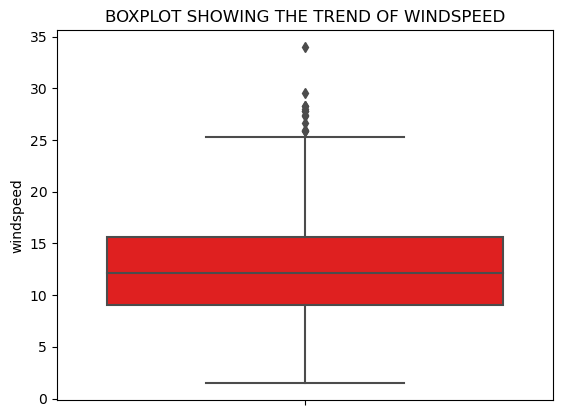

In [16]:
# Plotting boxplot for checking the weather trends.

weather = ["temp", "atemp", "hum", "windspeed"]

for x in weather:
    sns.boxplot(y = df[x], color = "Red")
    plt.title("Boxplot showing the trend of ".upper()+ x.upper())
    plt.show()


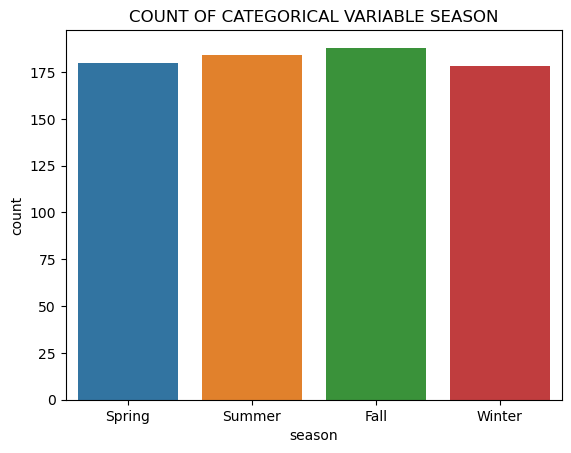

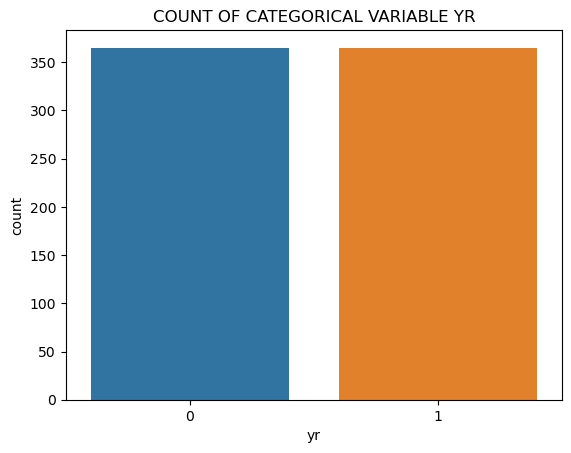

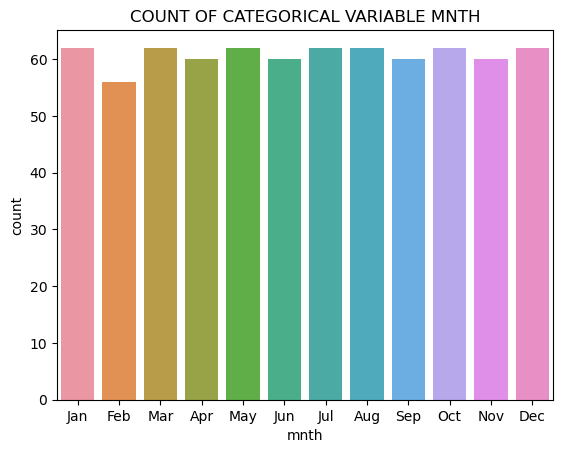

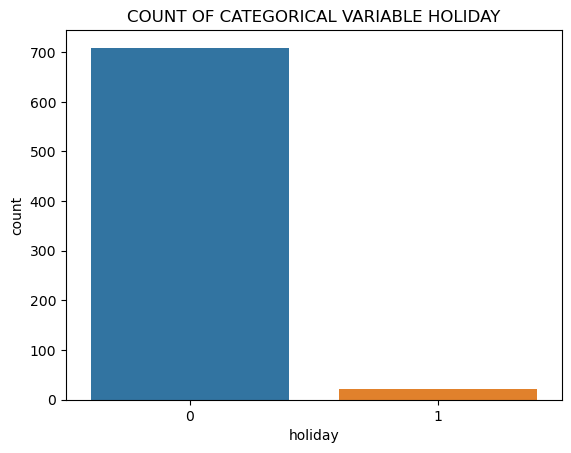

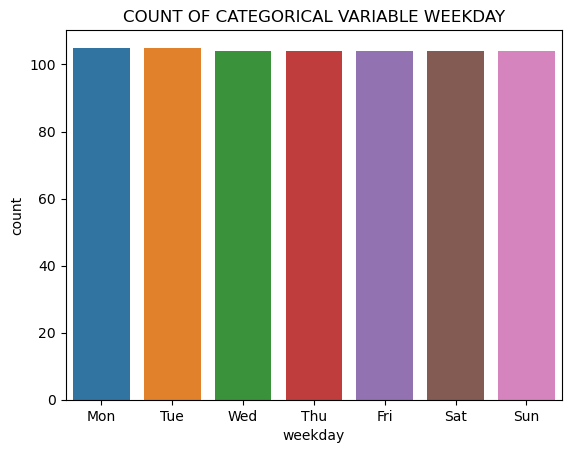

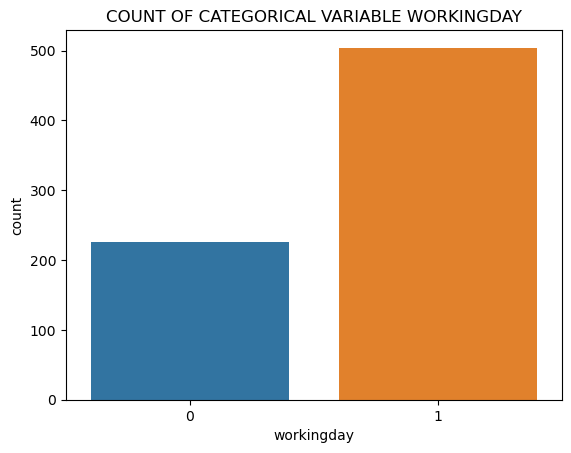

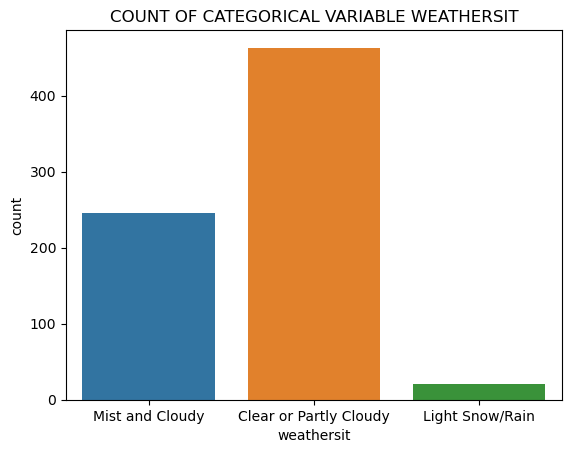

In [17]:
cat_var = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
for x in cat_var:
    sns.countplot(df[x])
    plt.title("Count of Categorical Variable ".upper()+ x.upper())
    plt.show()

# Bivariate Analysis

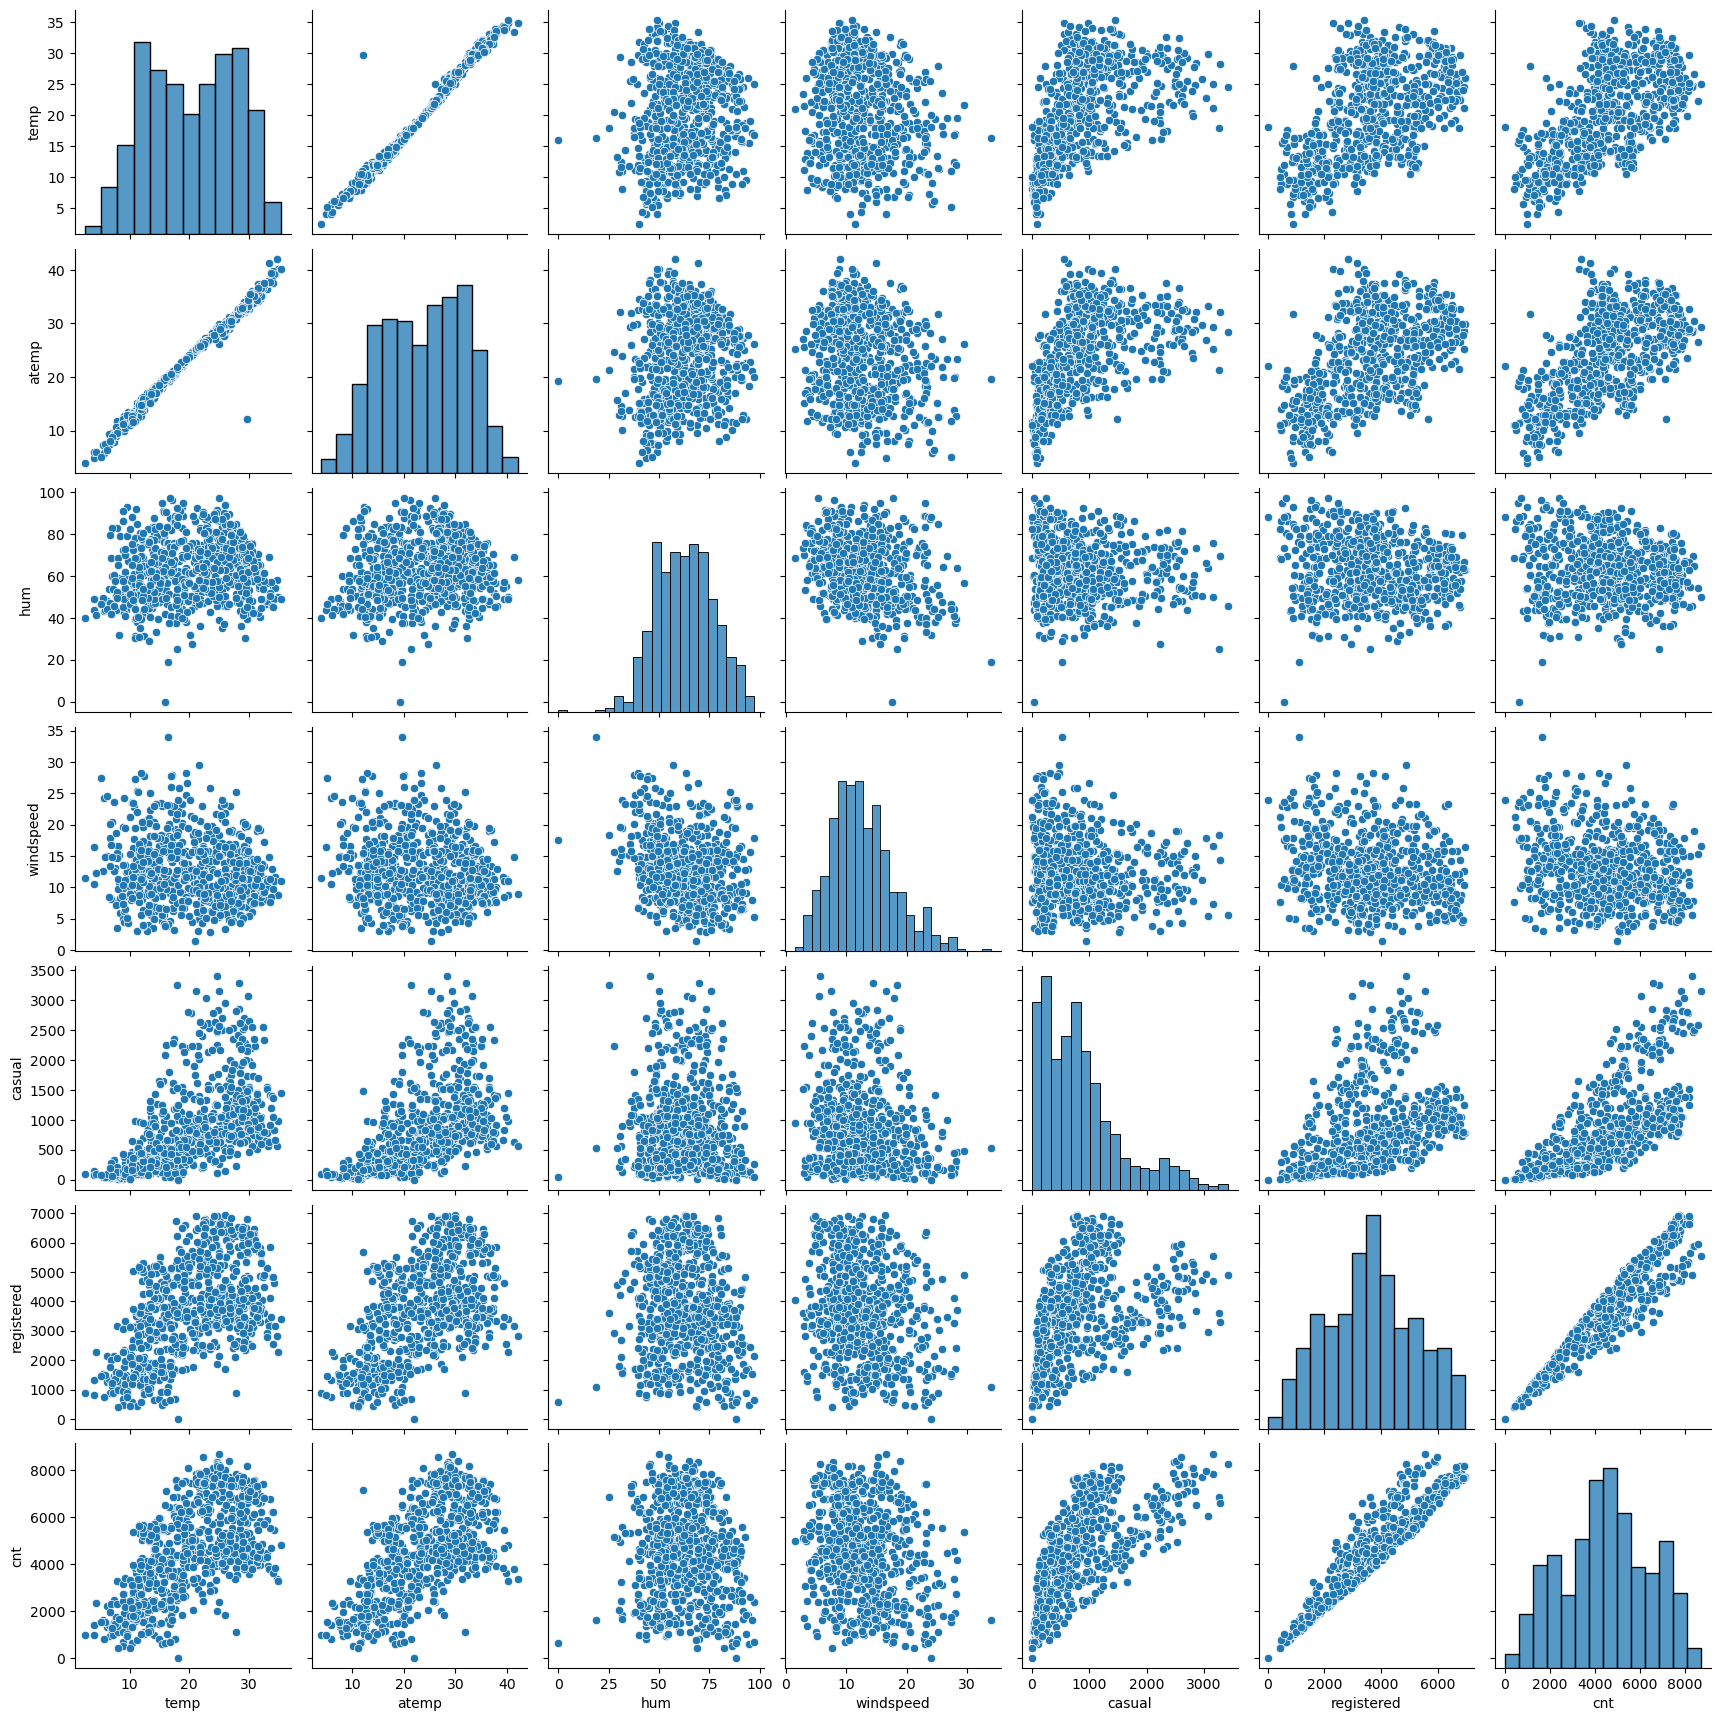

In [18]:
# Bivariate analysis between the continuous independent variables and the target variable.

cont_var_df = df[["temp", "atemp", "hum" , "windspeed", "casual", "registered", "cnt"]]
sns.pairplot(cont_var_df)
plt.show()

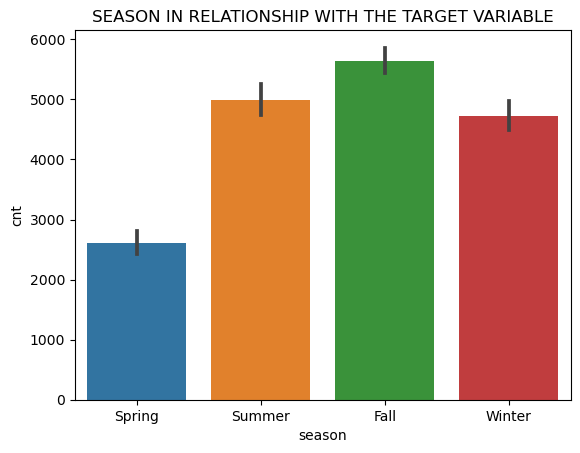

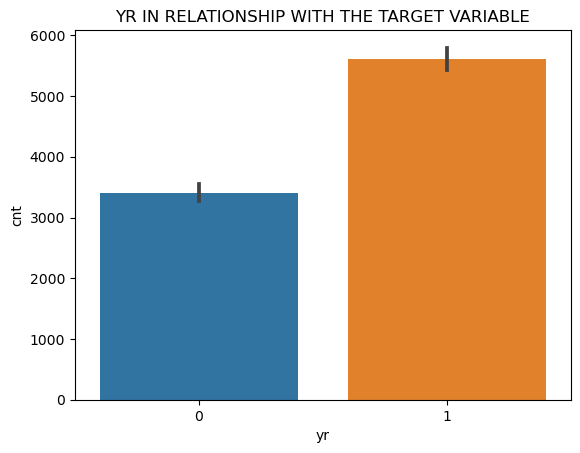

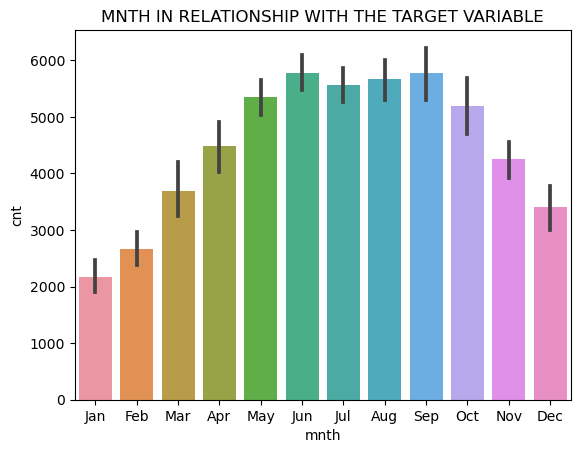

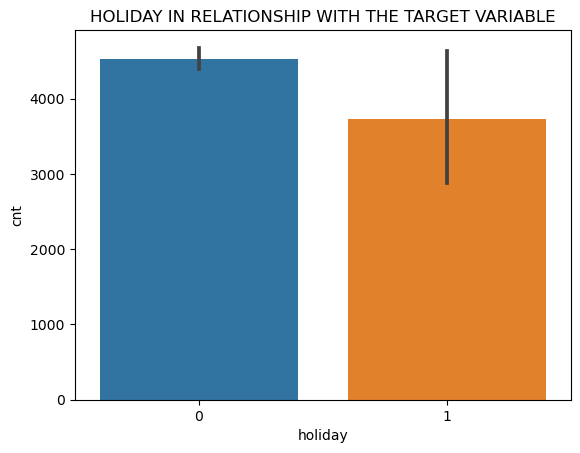

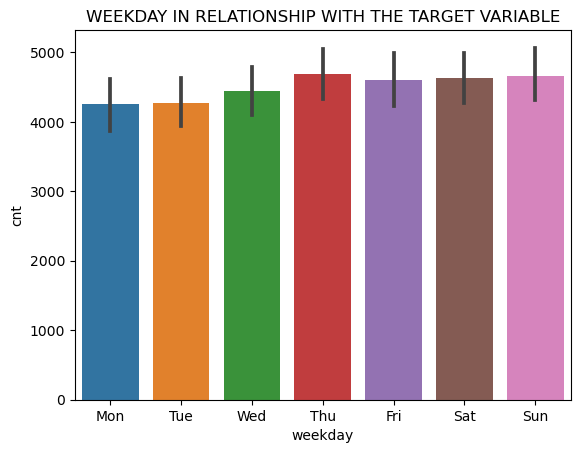

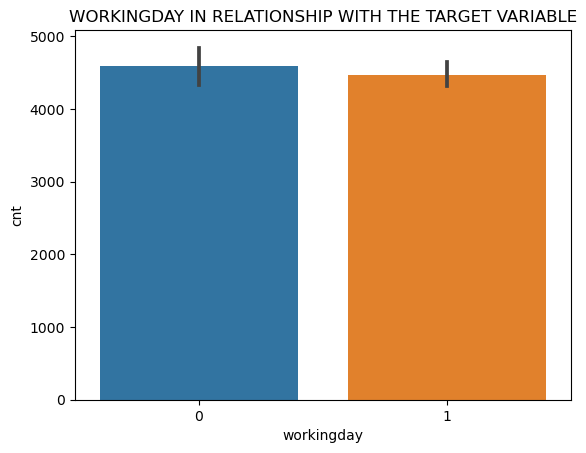

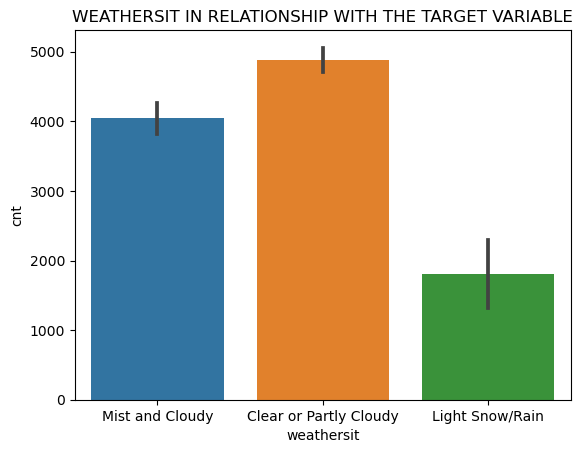

In [19]:
# Relationship between the categorical independent variable and the target variable.

for i in cat_var:
    sns.barplot(x = i, y = "cnt", data = df)
    plt.title(i.upper()+ " in relationship with the target variable".upper())
    plt.show()

## Inferences -

- Booking count has increased in the year 2019 as compared to the number of booking count in the year 2018.


- Demand is seen to be the highest in the Fall Season.


- It is seen that there is a little increase in booking count on the non-working day as compared to the demand on the working day.


- When the weather situation is clear or Partly cloudy that’s when the booking count is seen to be the highest.


- From January till June there’s a constant increase in the number of booking count.


- There’s a fall in the number of booking count as we approach towards the end of year.


In [20]:
# Code to check the difference between demand on working day vs on the non working day.
demand_summary = df.pivot_table(values = "cnt", aggfunc = "mean", index = "workingday")

In [21]:
demand_summary.reset_index(inplace= True)

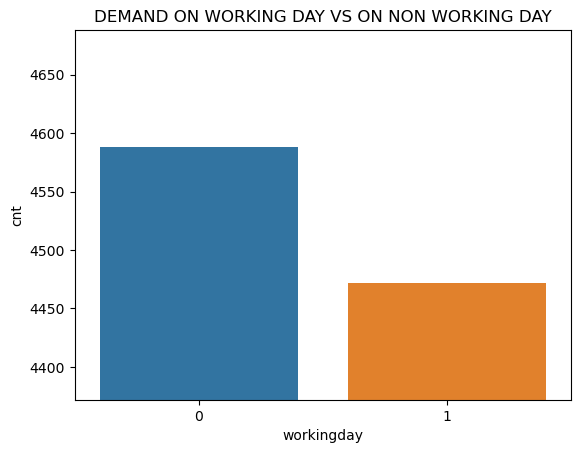

In [22]:
sns.barplot(x = "workingday", y = "cnt", data = demand_summary)
plt.ylim(min(round(demand_summary.cnt)-100),max(round(demand_summary.cnt)+100))
plt.title("Demand on Working Day vs on Non Working Day".upper())
plt.show()

- It can be clearly seen that the demand on the non working day is a bit higher compared to the demand on the working day.

In [23]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,Jan,0,Mon,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,Jan,0,Tue,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,Jan,0,Wed,1,Clear or Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,Jan,0,Thu,1,Clear or Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,Jan,0,Fri,1,Clear or Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [24]:
# Dropping the casual and registered variables.

df.drop(["casual", "registered"], inplace = True, axis = 1)

In [25]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear or Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear or Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear or Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
# Using heatmap to check the correlation between the different continuous variables.

corr_var_df = df[["temp","atemp","hum","windspeed","cnt", "holiday","workingday"]]

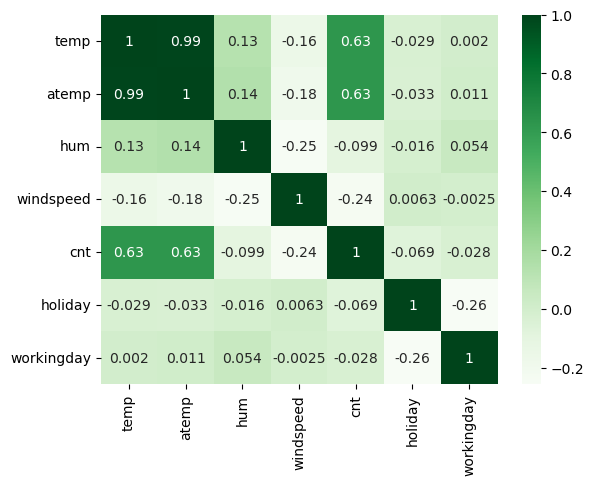

In [27]:
sns.heatmap(corr_var_df.corr(), annot = True, cmap = "Greens")
plt.show()

## Inferences -

- Temp variable has the highest correlation with the target variable.

In [28]:
# Creating Dummy variables.

season = pd.get_dummies(df.season, drop_first= True)
mnth = pd.get_dummies(df.mnth, drop_first= True)
weekday = pd.get_dummies(df.weekday, drop_first= True)
weathersit = pd.get_dummies(df.weathersit, drop_first= True)

df = pd.concat([df,season, mnth, weekday, weathersit], axis = 1)


In [29]:
df.drop(['season', 'mnth', 'weekday', 'weathersit'], inplace = True, axis = 1)

In [30]:
# Checking data frame head after creating the dummy variables.

df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow/Rain,Mist and Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


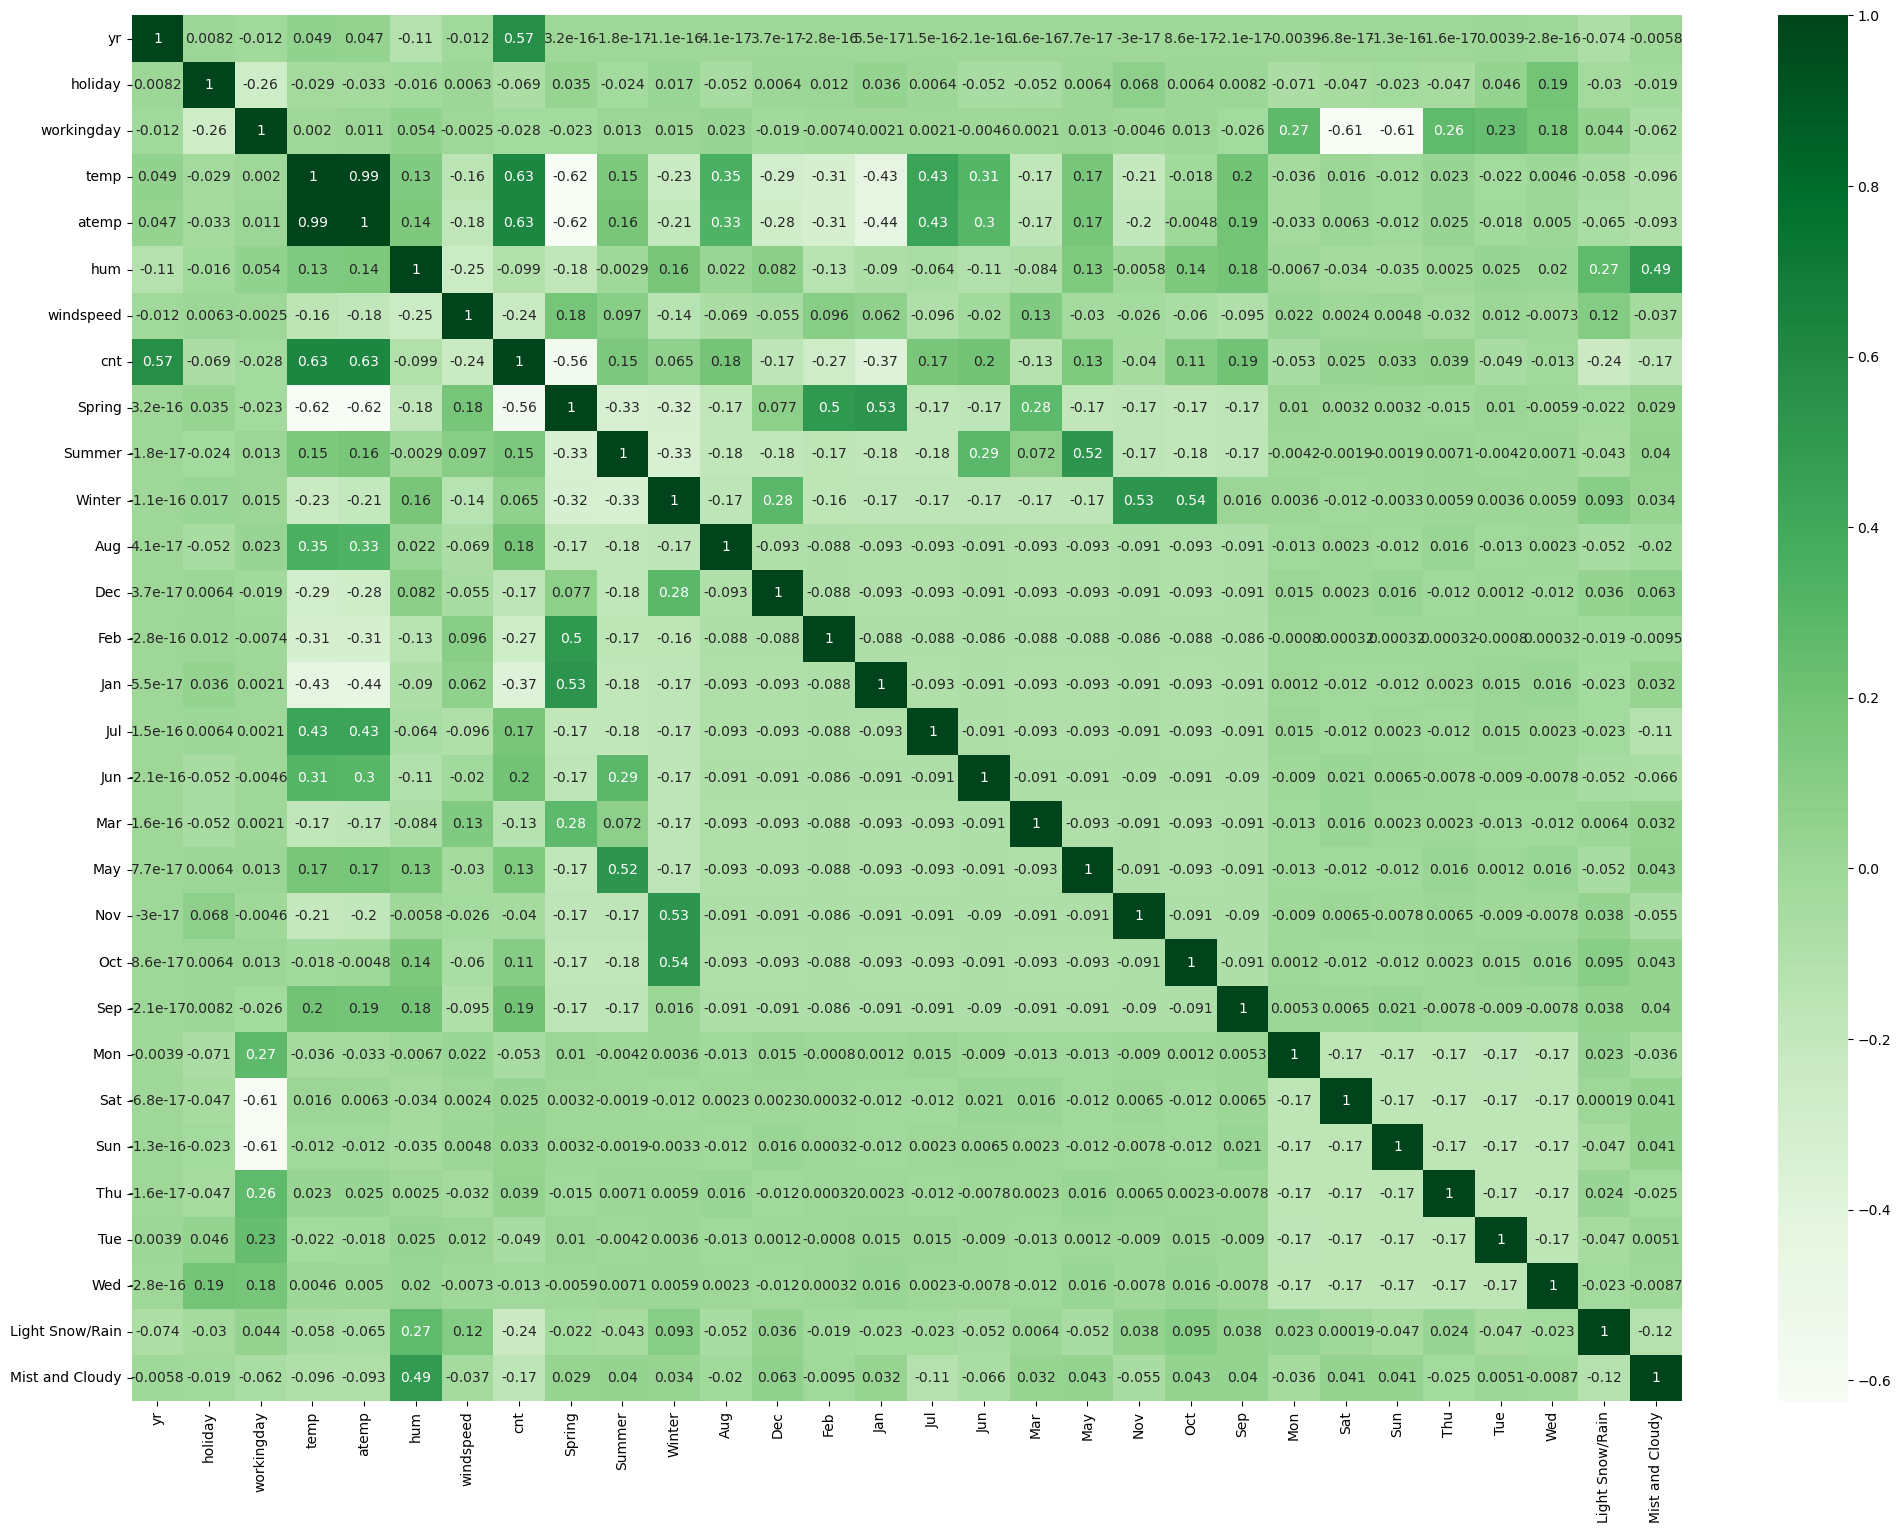

In [31]:
# Checking correlation between the variables after the creation of dummy variables.

plt.figure(figsize = (25,18))
sns.heatmap(df.corr(), annot = True, cmap = "Greens")
plt.show()



## Splitting the data into Training and Testing Sets

In [32]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [33]:
df_train.shape

(510, 30)

In [34]:
df_test.shape

(220, 30)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
num_var = [n for n in df_train if df_train[n].nunique()>2]
df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [38]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow/Rain,Mist and Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


## Splitting the Training Dataset into X and y

In [39]:
X_train = df_train
y_train = df_train.pop("cnt")

## Recursive Feature Elimination

In [40]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 5),
 ('Sun', False, 6),
 ('Thu', False, 14),
 ('Tue', False, 7),
 ('Wed', False, 11),
 ('Light Snow/Rain', True, 1),
 ('Mist and Cloudy', True, 1)]

In [43]:
col = X_train.columns[rfe.support_]

In [44]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [45]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [46]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [47]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          8.15e-189
Time:                        01:42:30   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3197      0.036     

In [48]:
X_train_new = X_train_rfe.drop(["Dec"], axis = 1)

In [49]:
X_train_lm = sm.add_constant(X_train_new)

In [50]:
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          4.41e-189
Time:                        01:42:30   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3032      0.035     

In [51]:
X_train_new_2 = X_train_new.drop(["Nov"], axis = 1)
X_train_lm_2 = sm.add_constant(X_train_new_2)
lm_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          7.59e-190
Time:                        01:42:30   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2964      0.035     

In [52]:
X_train_new_3 = X_train_new_2.drop("Jan", axis = 1)
X_train_lm_3 = sm.add_constant(X_train_new_3)
lm_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          2.95e-190
Time:                        01:42:30   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2848      0.034     

In [53]:
X_train_new_4 = X_train_new_3.drop("Spring", axis = 1)
X_train_lm_4 = sm.add_constant(X_train_new_4)
lm_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          6.89e-190
Time:                        01:42:30   Log-Likelihood:                 505.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2262      0.027     

In [54]:
X_train_new_5 = X_train_new_4.drop("Jul", axis = 1)
X_train_lm_5 = sm.add_constant(X_train_new_5)
lm_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          1.32e-189
Time:                        01:42:30   Log-Likelihood:                 502.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     499   BIC:                            -935.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2261      0.027     

In [55]:
X_train_new_5.drop("const", inplace = True, axis = 1)

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.25
2,temp,8.01
4,windspeed,3.56
9,Mist and Cloudy,2.11
0,yr,2.01
6,Winter,1.66
5,Summer,1.58
7,Sep,1.21
8,Light Snow/Rain,1.16
1,holiday,1.04


In [57]:
X_train_new_6 = X_train_new_5.drop("hum", axis = 1)
X_train_lm_6 = sm.add_constant(X_train_new_6)
lm_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          2.83e-186
Time:                        01:42:30   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1259      0.017     

In [58]:
vif = pd.DataFrame()
X = X_train_new_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,Summer,1.57
8,Mist and Cloudy,1.48
5,Winter,1.37
6,Sep,1.20
7,Light Snow/Rain,1.08
1,holiday,1.04


- All the above steps are performed till the most suitable model is found based on the significant P value and vif score.

In [59]:
y_train_pred = lm_6.predict(X_train_lm_6)

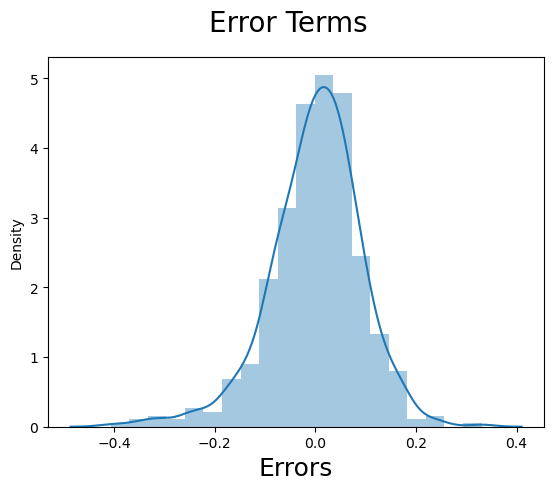

In [60]:
# Checking the distribution of the Error Terms.

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)       
plt.show()

In [61]:
df_test[num_var] = scaler.transform(df_test[num_var])

In [62]:
y_test = df_test.pop('cnt')
X_test = df_test

In [63]:
X_test_new = X_test[X_train_new_6.columns]
X_test_new = sm.add_constant(X_test_new)

In [64]:
y_pred = lm_6.predict(X_test_new)

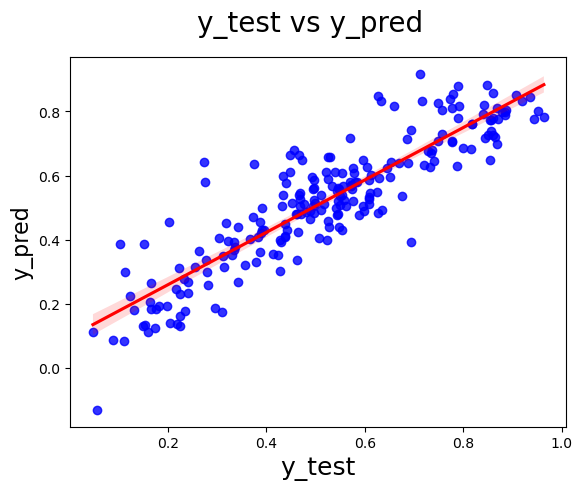

In [65]:
# Plotting the regression plot.

fig = plt.figure()
sns.regplot(y_test,y_pred, scatter_kws= {"color": "Blue"}, line_kws= {"color":"Red"} )
fig.suptitle('y_test vs y_pred', fontsize=20)       
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)     
plt.show()

In [66]:
from sklearn.metrics import r2_score

print("R2 score of Train Score Predictions -", round(r2_score(y_pred = y_train_pred , y_true = y_train),5))
print("R2 score of Test Score Predictions -", round(r2_score(y_pred = y_pred , y_true = y_test),5))
print("Absolute Difference between the Train Sore and Test Score Predictions -", abs(round(r2_score(y_pred = y_train_pred , y_true = y_train)-r2_score(y_pred = y_pred , y_true = y_test),5)))

R2 score of Train Score Predictions - 0.83035
R2 score of Test Score Predictions - 0.7942
Absolute Difference between the Train Sore and Test Score Predictions - 0.03615


- As the difference between the R2 value of Train Score Predictions and Test Score Predictions is less than 5% so we can conclude the model to be generalized.

### Equation for our Best Fitted line is :

- cnt = 0.1259 + 0.2329 X *yr* - 0.0987 X *holiday* + 0.5480 X *temp* - 0.1532 X *windspeed* + 0.0881 X *Summer* + 0.1293 X *Winter* +  0.1012 X *Sep* - 0.2829 X *Light Snow/Rain* - 0.0784 X *Mist and Cloudy*                                                   